## Orbitize Tutorial 1 - Orbits for the Impatient (OFTI)
find the tutorial online at https://orbitize.readthedocs.io/en/latest/tutorials/OFTI_tutorial.html
This document written by William Balmer in jupyter notebook for use in the Follette lab. 
The licencing for orbitize can be found here: https://github.com/sblunt/orbitize/blob/master/LICENSE

### Example 1, GJ504 "Pink Jupiter"

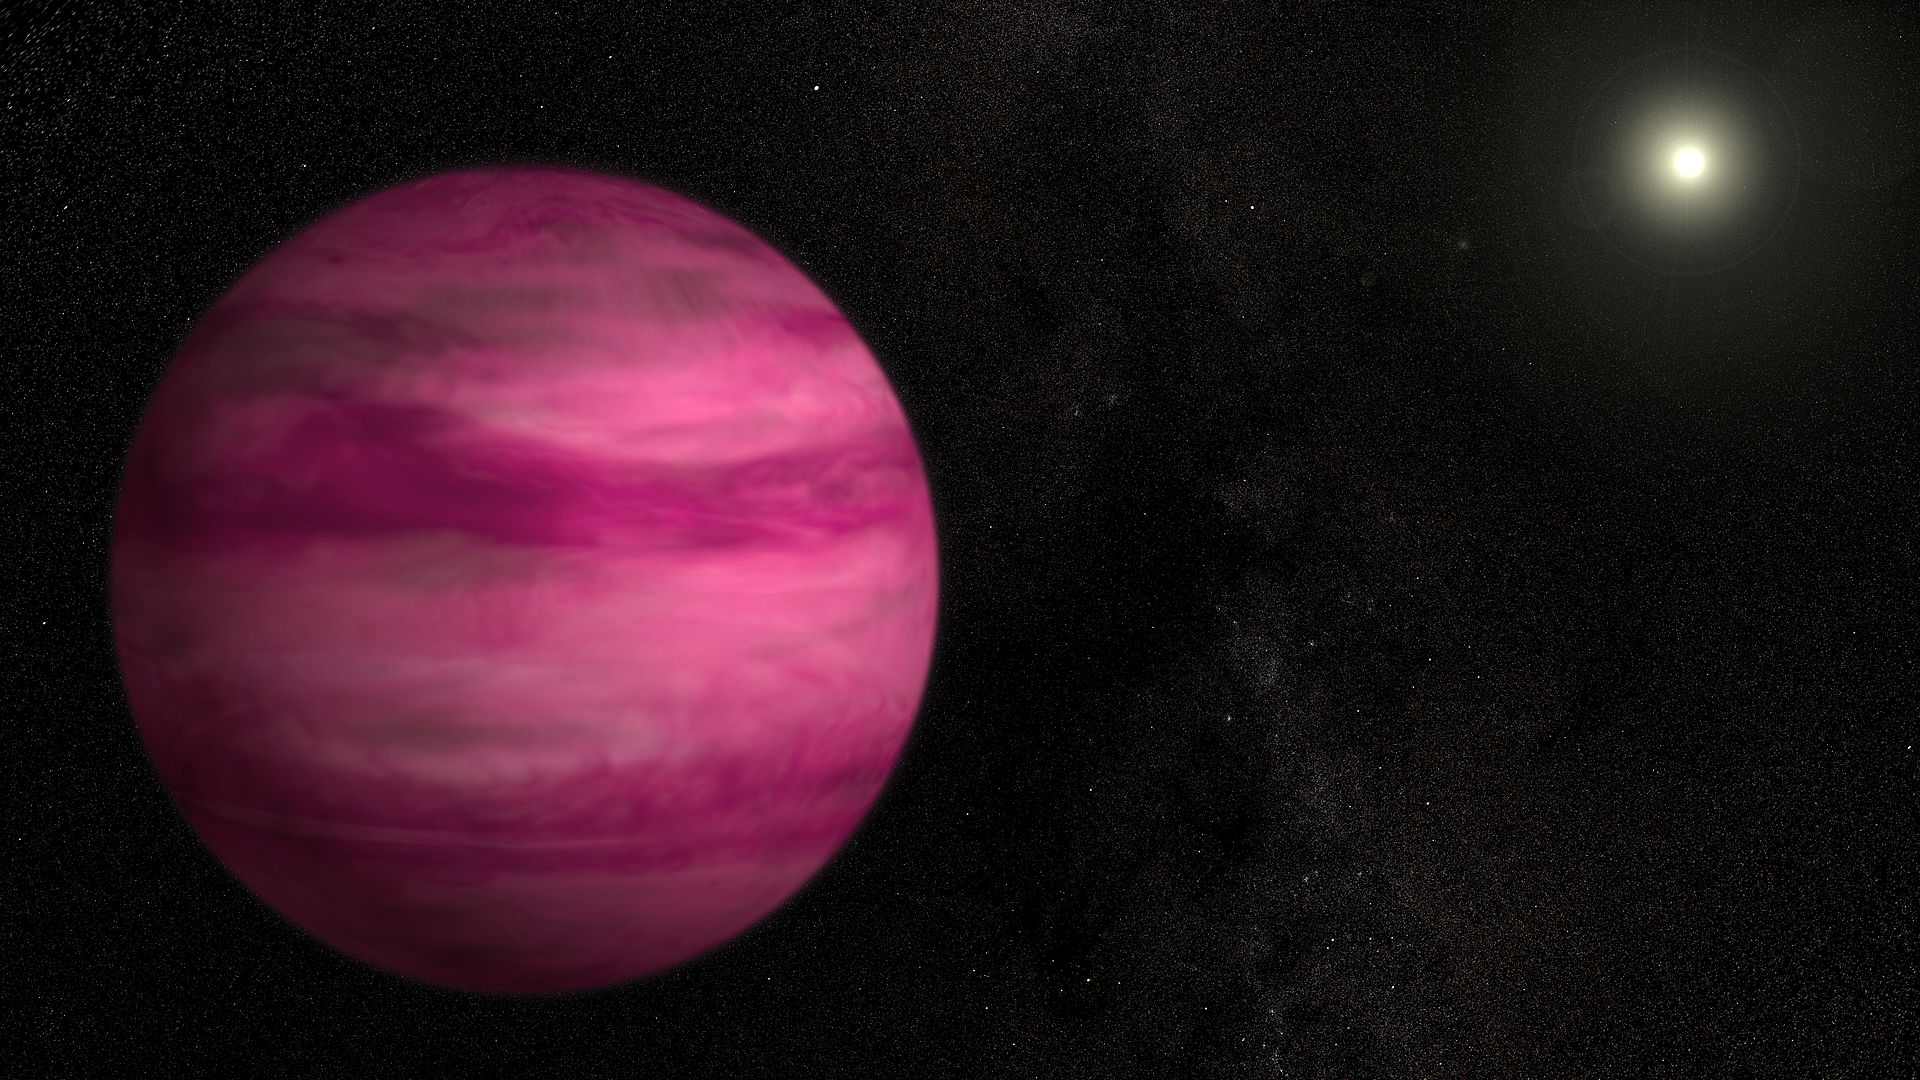

Question: How do we set up orbitize and use it to generate and plot an orbit?

In [1]:
import orbitize
import orbitize.driver
import matplotlib.pyplot as plt

In [22]:
myDriver = orbitize.driver.Driver('{}/HD142527_Watson.csv'.format(orbitize.DATADIR), # path to data file
                                  'OFTI', # name of algorithm for orbit-fitting
                                  1, # number of secondary bodies in system
                                  2.2, # total system mass [M_sun]
                                  6.356067237, # total parallax of system [mas]
                                  mass_err=0.34, # mass error [M_sun]
                                  plx_err=0.04714455423) # parallax error [mas]

In [24]:
s = myDriver.sampler
orbits = s.run_sampler(10)

KeyboardInterrupt: 

In [ ]:
myResults = s.results

In [ ]:
import pandas as pd
data = myResults.post
df = pd.DataFrame(data, columns=myResults.labels)

In [ ]:
#df.to_csv('test.csv')

In [ ]:
corner_figure = myResults.plot_corner()#param_list = ['sma1','ecc1','inc1', 'aop1', 'pan1', 'plx', 'mtot']) #create a corner plot

In [ ]:
orbit_figure = myResults.plot_orbits(start_mjd=s.epochs[0]) # Minimum MJD for colorbar (here we choose first data epoch)

plt.savefig("HD142527B_orbits.jpg")

### Example 2, GJ504 (again)

How does the corner plot and visualization change with larger n (more orbits generated)?

In [9]:
#for 10,000 generations
smore = myDriver.sampler
more_orbits = smore.run_sampler(1000)
myResults2 = smore.results

ValueError: supplied range of [nan, nan] is not finite

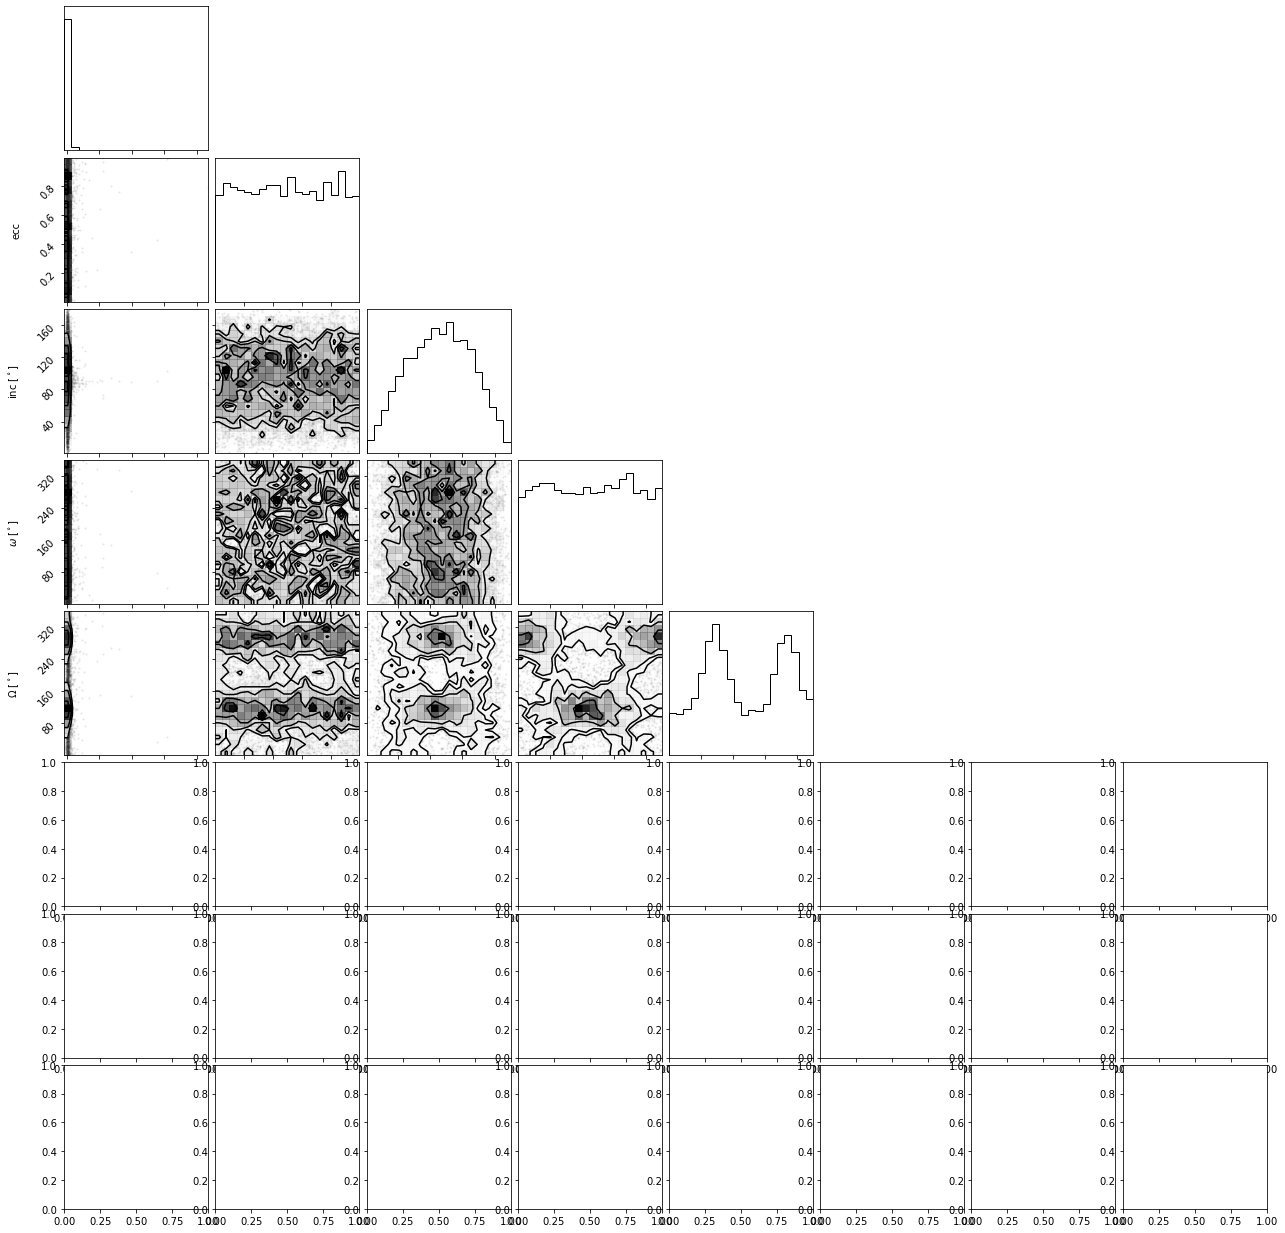

In [10]:
#corner figure for n = 10,000
corner_figure2 = myResults2.plot_corner()

In [ ]:
#visualization for n= 10,000
orbit_figure2 = myResults2.plot_orbits(
    start_mjd=s.epochs[0], # Minimum MJD for colorbar (here we choose first data epoch)
    sep_pa_color='xkcd:lavender',
    cmap='PuBu'
    
)
orbit_figure2.suptitle('10,000 orbits from GJ-504 fits')
plt.savefig("GJ504_orbits_10000.jpg")

Warning, this next step is time consuming and unnecessary for further understanding of the material. Do not run on a slow device or a device that you are currently running other tasks on. 

In [ ]:
#for 100,000 orbits
sevenmore = myDriver.sampler
even_more_orbits = sevenmore.run_sampler(100000) #this is time consuming! proceed with caution
myResults3 = sevenmore.results

In [ ]:
#corner figure for n = 100,000


In [ ]:
#visualization for n = 100,000
orbit_figure = myResults3.plot_orbits(
    start_mjd=s.epochs[0] # Minimum MJD for colorbar (here we choose first data epoch)
)
plt.savefig("GJ504_orbits_100000.jpg")

If you are interested in a tutorial on how to change your visualizations, visit this link: https://orbitize.readthedocs.io/en/latest/tutorials/Plotting_tutorial.html

Here is a link to the detailed api documentation on the "results" object: https://orbitize.readthedocs.io/en/latest/results.html

This is a link to the matplotlib colormaps (cmap keyword): https://matplotlib.org/tutorials/colors/colormaps.html

This is a link to the matplotlib colorstrings (sep_pa_color keyword): https://matplotlib.org/users/colors.html

Special thanks to Sarah Blunt for helping with the orbitize installation for Windows 10. If you are encountering trouble installing orbitize for windows, install the ptemcee package via github rather that PyPI, then attempt installing orbitize again.

happy plotting!

wb